# $\Lambda_b$ Reconstruction 

### Task

* Using the new data files, construct a histogram of the mass of the lambda_b by adding the four vectors of the pion, kaon, proton, muon, neutrino (stored as electrons in the code) 
    * This should have a peak 
* Construct a histogram of the mass of the lambda_b by adding the four vectors of the pion kaon, proton, and muon 
    * This should be a blob
* Take the events where J/Psi candidate is between 3.0 - 3.2 GeV and plot the lambda_b candidate using the proton, kaon, pion, and muon (no neutrino)
* Write a python function that takes in two vectors (as 3-element lists) and returns the angle between them
* Using the angle_between_2_vectors function, find the angle between the lambda_b and the neutrino and plot cos(theta)
    * Use momentum vectors


Actual Decay
$$\Lambda_b^0 \rightarrow \pi^+ + K^- + p + \mu^- + \nu$$ 

Fake Decay
$$\Lambda_b^0 \rightarrow J/\psi  K^-  p$$

* $J/\psi$ is fake because it's a pion and a muon rather than two muons

$\Lambda_b^0$ - is a hadron, but more specifically a baryon
* Mass = 5.620 GeV
* Composition = up + down + bottom quark
* Decays into a pion, kaon, proton, muon, and neutrino

$\pi^+$ is a pion or pi meson
* Made up of an up and anti-down quark
* Mass = 0.1395 GeV
* Pions are the lightest mesons, composed of the lightest quarks (up and down)
* Mean lifetime is 26 nanoseconds
* Charged pions most often decay into muons and muon neutrinos, and neutral pions into gamma rays

$K^-$ is the anti-particle of the Kaon or K Meson
* Mass = 0.494 GeV
* Composition = anti-up + strange quark

$p$ is a hadron, but more specifically a baryon composed of three quarks
* Mass = 0.93827 GeV
* Composition = 2 up + 1 down quark

$\mu^-$ is an unstable subatomic particle, classified as a lepton
* Mass = 0.105658 GeV
* Muon decay always produces at least three particles, which must include an electron of the same charge as the muon and two neutrinos of different types
* The muon is not believed to have any sub-structure (composed of any simpler particles) like that of all leptons

$\nu$ is a lepton
* Mass = $3.20 x 10^-10 GeV$
* Composition = elementary particle
* They are the only identified candidate for dark matter, specifically hot dark matter
* The majority of neutrinos in the vicinity of the Earth are from nuclear reactions in the Sun.
* Neutrinos come in three flavors:
    * $\nu_e$ - electron neutrinos
    * $\nu_\mu$ - muon neutrino
    * $\nu_\tau$ - tau neutrinos

This is the $\Lambda_b^0$ decay that we are looking at (neglecting the neutrino): $$\Lambda_b^0 \rightarrow p + \pi^+ + K^- + \mu^-$$

These are possible mis-identifications that could have led to the $J/\psi$ resonances observed

$$\Lambda_b^0 \rightarrow p + \mu^+ + K^- + \mu^-$$
$$\Lambda_b^0 \rightarrow p + \mu^+ + \mu^- + K^-$$
$$\Lambda_b^0 \rightarrow \mu^+ + p + K^- + \mu^-$$
$$\Lambda_b^0 \rightarrow \mu^+ + p + \mu^- + K^-$$

In [1]:
import lhcb_tools as lhcb
import lichen.lichen as lch
import numpy as np
import matplotlib.pylab as plt
%matplotlib notebook

# Comment this next line if you want the autoscroll back. 
%load_ext disable_autoscroll

/Applications/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


<IPython.core.display.Javascript object>

autoscrolling long output is disabled


In [2]:
import math
from math import sqrt
def mass(p4):
    E,px,py,pz = p4[0:4]
    m1 = (E**2-(px**2+py**2+pz**2))
    if m1>=0:
        return sqrt(m1)
    else:
        return sqrt(-m1)

def add_4_vecs(p4s):
    E,px,py,pz = (0,0,0,0)

    for p4 in p4s:
        E += p4[0]
        px += p4[1]
        py += p4[2]
        pz += p4[3]

    p4tot = [E,px,py,pz]    
    return p4tot

def redefine_4vec(p4, newmass):
    px = p4[1]
    py = p4[2]
    pz = p4[3]
    newE = np.sqrt(newmass*newmass + px*px + py*py + pz*pz)
    return [newE,px,py,pz]

def angle_between_2_vectors(a,b):
    angle = 0
    dot_product = a[0]*b[0]+a[1]*b[1]+a[2]*b[2]
    a_mag = sqrt(a[0]*a[0]+a[1]*a[1]+a[2]*a[2])
    b_mag = sqrt(b[0]*b[0]+b[1]*b[1]+b[2]*b[2])
    mag = a_mag * b_mag
    theta = math.acos(dot_product/mag)
    return theta

x = [1,0,0] 
y = [0,0,1] 
angle = angle_between_2_vectors(x,y) 
print angle

1.57079632679


In [3]:
#infile = open("ToyMC_LHCb_BtoLambdacmunu.dat",'r')
#infile = open('ToyMC_LHCb_BtoLambdacmunu_5MeV_resolution.dat')
#infile = open('ToyMC_LHCb_BtoLambdacmunu_5MeV_resolution_100k.dat')
infile = open('ToyMC_LHCb_BtoLambdacmunu_0.5pct_resolution_100k.dat')
#infile = open('ToyMC_LHCb_BtoLambdacmunu_0.5pct_resolution_1M.dat')


npions = []
nkaons = []
nprotons = []
nmuons = []
nneutrinos = []

pion_mass = []
kaon_mass = []
proton_mass = []
muon_mass = []
neutrino_mass = [] # Neutrinos are stored as electrons (charge = 0)
lambda_b_mass1 = []
lambda_b_mass2 = []
lambda_c_mass = []
jpsi_mass1 = [] # This is not real
jpsi_mass2 = []
jpsi_mass3 = []
jpsi_mass4 = []
pq_mass1 = []
pq_mass2 = []
pq_mass3 = []
pq_mass4 = []

fake_lambda_b_mass1 = [] 
fake_lambda_b_mass2 = [] 
fake_lambda_b_mass3 = [] 
fake_lambda_b_mass4 = [] 
angles = []


collisions = lhcb.get_collisions(infile,False)
print len(collisions)

for collision in collisions:
    
    pions,kaons,protons,muons,neutrinos,photons = collision
    
    npions.append(len(pions))
    nkaons.append(len(kaons))
    nprotons.append(len(protons))
    nmuons.append(len(muons))
    nneutrinos.append(len(neutrinos))
    
    pion_p4 = pions[0][0:4]
    mpion = mass(pion_p4)
    pion_mass.append(mpion)
        
    kaon_p4 = kaons[0][0:4]
    mkaon = mass(kaon_p4)
    kaon_mass.append(mkaon)
            
    proton_p4 = protons[0][0:4]
    mproton = mass(proton_p4)
    proton_mass.append(mproton)
                
    muon_p4 = muons[0][0:4]
    mmuon = mass(muon_p4)
    muon_mass.append(mmuon)

    nu_p4 = neutrinos[0][0:4]
    mneutrino = mass(nu_p4)
    neutrino_mass.append(mneutrino)

    lbp4_1 = add_4_vecs([pion_p4, kaon_p4, proton_p4, muon_p4, nu_p4])
    lbp4_2 = add_4_vecs([pion_p4, kaon_p4, proton_p4, muon_p4])
    lc = add_4_vecs([pion_p4, kaon_p4, proton_p4])

    fake_muon1 = redefine_4vec(pion_p4, 0.105)
    fake_muon2 = redefine_4vec(kaon_p4, 0.105)
    fake_muon3 = redefine_4vec(proton_p4, 0.105)
    fake_kaon = redefine_4vec(muon_p4, 0.494)
    fake_proton = redefine_4vec(pion_p4, 0.938)

    jpsi1 = add_4_vecs([fake_muon1,muon_p4]) # Fake!
    jpsi2 = add_4_vecs([fake_muon1,fake_muon2])
    jpsi3 = add_4_vecs([fake_muon3,muon_p4])
    jpsi4 = add_4_vecs([fake_muon3,fake_muon2])

    mlambda_b1 = mass(lbp4_1)
    mlambda_b2 = mass(lbp4_2)
    mlambda_c = mass(lc)
    mjpsi1 = mass(jpsi1) # Fake!
    mjpsi2 = mass(jpsi2)
    mjpsi3 = mass(jpsi3)
    mjpsi4 = mass(jpsi4)

    lambda_b_mass1.append(mlambda_b1)   
    lambda_b_mass2.append(mlambda_b2)
    lambda_c_mass.append(mlambda_c)
    
    jpsi_mass1.append(mjpsi1)
    jpsi_mass2.append(mjpsi2)
    jpsi_mass3.append(mjpsi3)
    jpsi_mass4.append(mjpsi4)
    
    #angle_between_lambda_b_and_neutrino = angle_between_2_vectors(lbp4_1[1:3],nu_p4[1:3])
    #print lbp4_1[1],lbp4_1[2],lbp4_1[3]

    theta = angle_between_2_vectors(lbp4_1[1:4],nu_p4[1:4])
    angle = math.cos(theta)
    angles.append(angle)
    

    jpsi_window = 0.048 # Select jpsis that are +/- this value
    #jpsi_window = 1.0

#     if mjpsi>3.096-jpsi_window and mjpsi<3.096+jpsi_window and angle>0.998:
#         jpsi = redefine_4vec(jpsi, 3.096)
#         #print mass(jpsi)
        
#         fake_lbp4 = add_4_vecs([jpsi,proton_p4,kaon_p4])
#         fakemlambda_b = mass(fake_lbp4)
#         fake_lambda_b_mass.append(fakemlambda_b)

#         if fakemlambda_b>5.6 and fakemlambda_b<5.65:
#             pq_p4 = add_4_vecs([jpsi,proton_p4])
#             pq_mass.append(mass(pq_p4))
            
    fake_jpsi1 = redefine_4vec(jpsi1, 3.096)
    fake_jpsi2 = redefine_4vec(jpsi2, 3.096)
    fake_jpsi3 = redefine_4vec(jpsi3, 3.096)
    fake_jpsi4 = redefine_4vec(jpsi4, 3.096)
    #print mass(jpsi)

    fake_lbp41 = add_4_vecs([fake_jpsi1,proton_p4,kaon_p4])
    fakemlambda_b1 = mass(fake_lbp41)
    #print fakemlambda_b1
    fake_lambda_b_mass1.append(fakemlambda_b1)
    
    fake_lbp42 = add_4_vecs([fake_jpsi2,proton_p4,fake_kaon])
    fakemlambda_b2 = mass(fake_lbp42)
    fake_lambda_b_mass2.append(fakemlambda_b2)
    
    fake_lbp43 = add_4_vecs([fake_jpsi3,fake_proton,kaon_p4])
    fakemlambda_b3 = mass(fake_lbp43)
    fake_lambda_b_mass3.append(fakemlambda_b3)
    
    fake_lbp44 = add_4_vecs([fake_jpsi4,fake_proton,fake_kaon])
    fakemlambda_b4 = mass(fake_lbp44)
    fake_lambda_b_mass4.append(fakemlambda_b4)

    pq_p41 = add_4_vecs([fake_jpsi1,proton_p4])
    pq_mass1.append(mass(pq_p41))
    
    pq_p42 = add_4_vecs([fake_jpsi2,proton_p4])
    pq_mass2.append(mass(pq_p42))
    
    pq_p43 = add_4_vecs([fake_jpsi3,fake_proton])
    pq_mass3.append(mass(pq_p43))
    
    pq_p44 = add_4_vecs([fake_jpsi4,fake_proton])
    pq_mass4.append(mass(pq_p44))

    
print "Processed data!"

# Turn some of these lists into arrays for easier selection cuts. 
jpsi_mass1 = np.array(jpsi_mass1)
fake_lambda_b_mass1 = np.array(fake_lambda_b_mass1)
print fake_lambda_b_mass1[0:10]
pq_mass1 = np.array(pq_mass1)

jpsi_mass2 = np.array(jpsi_mass2)
fake_lambda_b_mass2 = np.array(fake_lambda_b_mass2)
pq_mass2 = np.array(pq_mass2)

jpsi_mass3 = np.array(jpsi_mass3)
fake_lambda_b_mass3 = np.array(fake_lambda_b_mass3)
pq_mass3 = np.array(pq_mass3)

jpsi_mass4 = np.array(jpsi_mass4)
fake_lambda_b_mass4 = np.array(fake_lambda_b_mass4)
pq_mass4 = np.array(pq_mass4)

angles = np.array(angles)



99987
Processed data!
[ 6.01708023  6.63790742  5.62670677  8.25181307  5.55300681  5.81254211
  6.30548712  5.26174996  5.71830874  6.21801056]


<IPython.core.display.Javascript object>


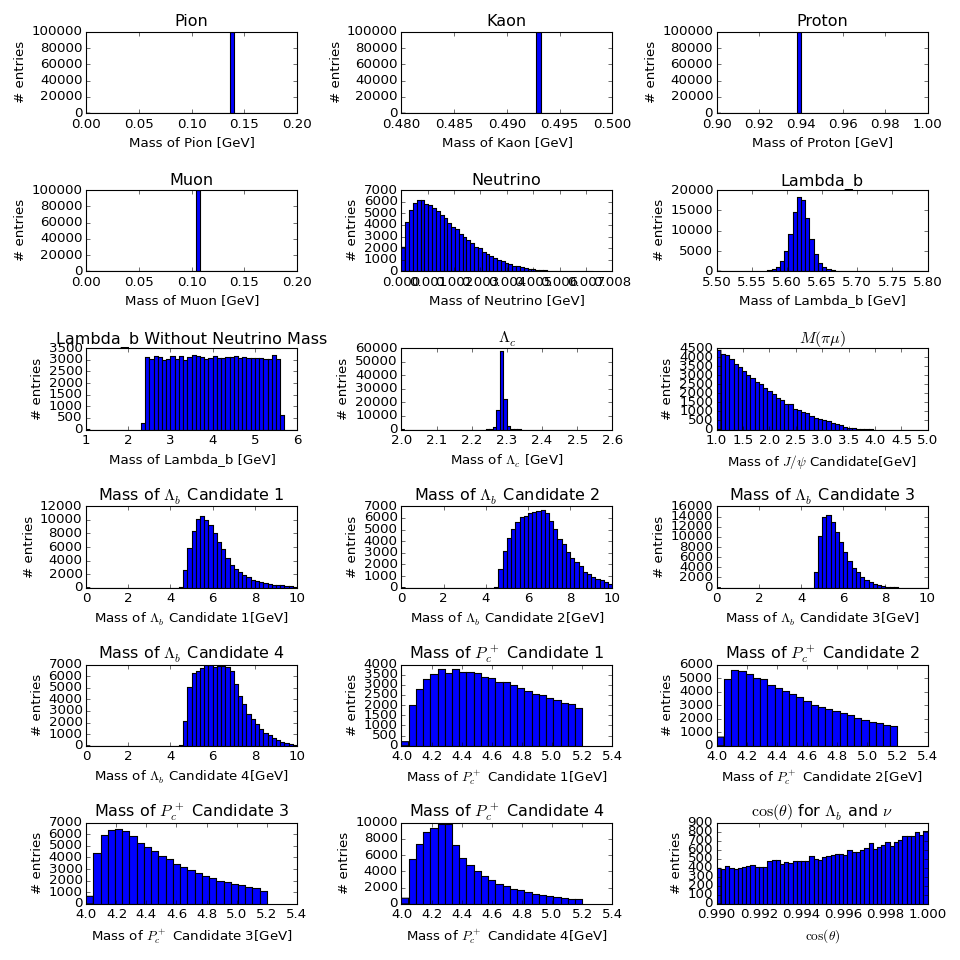

[ 6.01708023  6.63790742  5.62670677  8.25181307  5.55300681  5.81254211
  6.30548712  5.26174996  5.71830874  6.21801056  5.78985712  6.39001572
  5.46273152  5.35970753  5.40560136  5.23655515  6.73967723  5.38353328
  5.76520612  5.27927964  6.50228193  7.23139531  6.6489259   5.10851637
  5.82331171  8.10425522  5.85644685  5.6313048   5.12043618  5.33533971
  5.48086141  5.21122257  5.28753856  6.5258194   6.33913676  5.58861783
  6.57287817  5.57190979  5.28765638  5.46355204  6.15501395  5.51650622
  6.27660905  5.41200045  5.70926315  5.92926214  5.76488485  5.0329713
  5.54291605  4.98980471  5.46933382  6.53701985  6.03004634  5.01853226
  4.93745942  5.57397328  5.91612401  6.97174295  5.28755603  5.01165604
  5.70728436  7.00980388  5.92211967  6.78434218  5.32463847  8.14525591
  5.00988188  7.12477856  6.70828702  4.96000894  6.04259962  7.15951707
  7.4200855   5.84045473  5.98077609  6.21734522  8.18706818  7.44567729
  5.42989015  7.43866192  5.96250382  6.93415645  6.

In [8]:
plt.figure(figsize=(12,12))
plt.subplot(6,3,1)
plt.hist(pion_mass,bins=50,range=(0,0.2))
plt.xlabel('Mass of Pion [GeV]')
plt.ylabel('# entries')
plt.title('Pion')  

plt.subplot(6,3,2)
plt.hist(kaon_mass,bins=50,range=(0.48,0.5))
plt.xlabel('Mass of Kaon [GeV]')
plt.ylabel('# entries')
plt.title('Kaon')

plt.subplot(6,3,3)
plt.hist(proton_mass,bins=50,range=(0.9,1))
plt.xlabel('Mass of Proton [GeV]')
plt.ylabel('# entries')
plt.title('Proton') 

plt.subplot(6,3,4)
plt.hist(muon_mass,bins=50,range=(0,0.2))
plt.xlabel('Mass of Muon [GeV]')
plt.ylabel('# entries')
plt.title('Muon')

plt.subplot(6,3,5)
plt.hist(neutrino_mass,bins=50)
plt.xlabel('Mass of Neutrino [GeV]')
plt.ylabel('# entries')
plt.title('Neutrino') 

plt.subplot(6,3,6)
plt.hist(lambda_b_mass1,bins=50,range=(5.5,5.8))
plt.xlabel('Mass of Lambda_b [GeV]')
plt.ylabel('# entries')
plt.title('Lambda_b') 

plt.subplot(6,3,7)
plt.hist(lambda_b_mass2,bins=50,range=(1,6))
plt.xlabel('Mass of Lambda_b [GeV]')
plt.ylabel('# entries')
plt.title('Lambda_b Without Neutrino Mass')

plt.subplot(6,3,8)
plt.hist(lambda_c_mass,bins=50,range=(2,2.5))
plt.xlabel(r'Mass of $\Lambda_c$ [GeV]')
plt.ylabel('# entries')
plt.title(r'$\Lambda_c$')

plt.subplot(6,3,9)
plt.hist(jpsi_mass1,bins=50,range=(1,5))
plt.xlabel(r'Mass of $J/\psi$ Candidate[GeV]')
plt.ylabel('# entries')
plt.title(r'$M(\pi \mu)$')


#######################################################
# Here is where we are making selections
#######################################################

jpsi_window = 0.048 # Select jpsis that are +/- this value
#jpsi_window = 1.0

index1 = np.ones(len(jpsi_mass1),dtype=bool)
#index1  = jpsi_mass1>3.096-jpsi_window
#index1 *= jpsi_mass1<3.096+jpsi_window
#index1 *= fake_lambda_b_mass1>5.6
#index1 *= fake_lambda_b_mass1<5.65
#index1 *= angles>0.99

index2 = np.ones(len(jpsi_mass2),dtype=bool)
#index2  = jpsi_mass2>3.096-jpsi_window
#index2 *= jpsi_mass2<3.096+jpsi_window
#index2 *= fake_lambda_b_mass2>5.6
#index2 *= fake_lambda_b_mass2<5.65
#index2 *= angles>0.99

index3 = np.ones(len(jpsi_mass3),dtype=bool)
#index3  = jpsi_mass3>3.096-jpsi_window
#index3 *= jpsi_mass3<3.096+jpsi_window
#index3 *= fake_lambda_b_mass3>5.6
#index3 *= fake_lambda_b_mass3<5.65
#index3 *= angles>0.99

index4 = np.ones(len(jpsi_mass4),dtype=bool)
#index4  = jpsi_mass4>3.096-jpsi_window
#index4 *= jpsi_mass4<3.096+jpsi_window
#index4 *= fake_lambda_b_mass4>5.6
#index4 *= fake_lambda_b_mass4<5.65
#index4 *= angles>0.99

plt.subplot(6,3,10)
print fake_lambda_b_mass1[index1][0:100]
plt.hist(fake_lambda_b_mass1[index1],bins=50,range=(0,10))
plt.xlabel(r'Mass of $\Lambda_b$ Candidate 1[GeV]')
plt.ylabel('# entries')
plt.title(r'Mass of $\Lambda_b$ Candidate 1')

plt.subplot(6,3,11)
plt.hist(fake_lambda_b_mass2[index2],bins=50,range=(0,10))
plt.xlabel(r'Mass of $\Lambda_b$ Candidate 2[GeV]')
plt.ylabel('# entries')
plt.title(r'Mass of $\Lambda_b$ Candidate 2')

plt.subplot(6,3,12)
plt.hist(fake_lambda_b_mass3[index3],bins=50,range=(0,10))
plt.xlabel(r'Mass of $\Lambda_b$ Candidate 3[GeV]')
plt.ylabel('# entries')
plt.title(r'Mass of $\Lambda_b$ Candidate 3')

plt.subplot(6,3,13)
plt.hist(fake_lambda_b_mass4[index4],bins=50,range=(0,10))
plt.xlabel(r'Mass of $\Lambda_b$ Candidate 4[GeV]')
plt.ylabel('# entries')
plt.title(r'Mass of $\Lambda_b$ Candidate 4')

plt.subplot(6,3,14)
plt.hist(pq_mass1[index1],bins=25,range=(4,5.2))
plt.xlabel(r'Mass of $P_c^+$ Candidate 1[GeV]')
plt.ylabel('# entries')
plt.title(r'Mass of $P_c^+$ Candidate 1')

plt.subplot(6,3,15)
plt.hist(pq_mass2[index2],bins=25,range=(4,5.2))
plt.xlabel(r'Mass of $P_c^+$ Candidate 2[GeV]')
plt.ylabel('# entries')
plt.title(r'Mass of $P_c^+$ Candidate 2')

plt.subplot(6,3,16)
plt.hist(pq_mass3[index3],bins=25,range=(4,5.2))
plt.xlabel(r'Mass of $P_c^+$ Candidate 3[GeV]')
plt.ylabel('# entries')
plt.title(r'Mass of $P_c^+$ Candidate 3')

plt.subplot(6,3,17)
plt.hist(pq_mass4[index4],bins=25,range=(4,5.2))
plt.xlabel(r'Mass of $P_c^+$ Candidate 4[GeV]')
plt.ylabel('# entries')
plt.title(r'Mass of $P_c^+$ Candidate 4')

plt.subplot(6,3,18)
plt.hist(angles,bins=50,range=(0.99,1))
plt.xlabel(r'$\cos(\theta)$')
plt.ylabel('# entries')
plt.title(r'$\cos(\theta)$ for $\Lambda_b$ and $\nu$')

print len(angles)
#print len(angles[angles>0.998])

plt.tight_layout()
